# Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the *I-94 Interstate highway*. The main goal of our analysis is to determine a few indicators of heavy traffic on I-94, that could be weather type, time of the day, time of the week, etc.
Bellow, here is the dataset dictionary:
- **holiday:** Categorical US National holidays plus regional holiday, Minnesota State Fair
- **temp:** Numeric Average temp in kelvin
- **rain_1h:** Numeric Amount in mm of rain that occurred in the hour
- **snow_1h:** Numeric Amount in mm of snow that occurred in the hour
- **clouds_all:** Numeric Percentage of cloud cover
- **weather_main:** Categorical Short textual description of the current weather
- **weather_description:** Categorical Longer textual description of the current weather
- **date_time:** DateTime Hour of the data collected in local CST time
- **traffic_volume:** Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Furthermore, according to the dataset documentation, a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


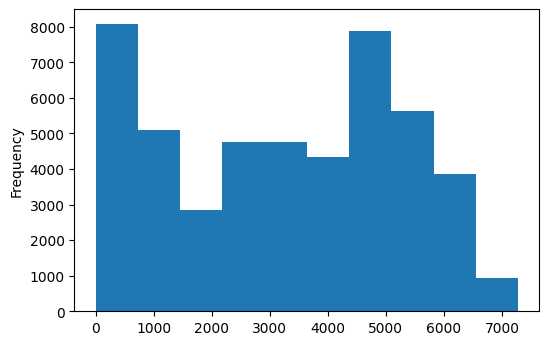

In [4]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There are 48,204 datapoints, ranged from October/2012 to September/2018, reaching no car at all at its lowest value in some hour(s) and as the highest traffic, we have 7,280 cars passing by in one hour. Furthermore, about 25% of the time, there are 1,193 cars or less passing the station and, about others 25% of the time, the traffic was four times more (4,933 cars hourly).

Observing the histogram above, it seems there are two different distributions overlapped, one right skewed with its peak at 0 - 700 traffic volume interval, while the other approximates a normal distribution, peaked at 4500 - 5200 interval. 
Maybe exists a influence of daytime and nighttime in this behavior, as in nighttime there is less traffic and more in daytime. Thus, we'll check this out.

# Analyzing the Daytime Influence
We will divide the dataset into two parts:
- Daytime: From 07:00 to 19:00 (12 hours)
- Nighttime: From 19:00 to 07:00 (12 hours)

Even though it's not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time']) # Converting
# the string object to datetime
Hours = traffic['date_time'].dt.hour
traffic_day = traffic[Hours.between(7, 18)] # Filtering the dataframe
# to have only rows between the 07:00 - 19:00 period
traffic_night = traffic[Hours.between(0, 6) | Hours.between(19, 23)]
# Same here, but to the 19:00 - 07:00 period

In [7]:
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [8]:
traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


In [9]:
# It seems there is more data in the traffic_night data than 
# traffic_day, so we'll count the Hours series just to certify
# we didn't miss anything.
Hours.value_counts(dropna=False).sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

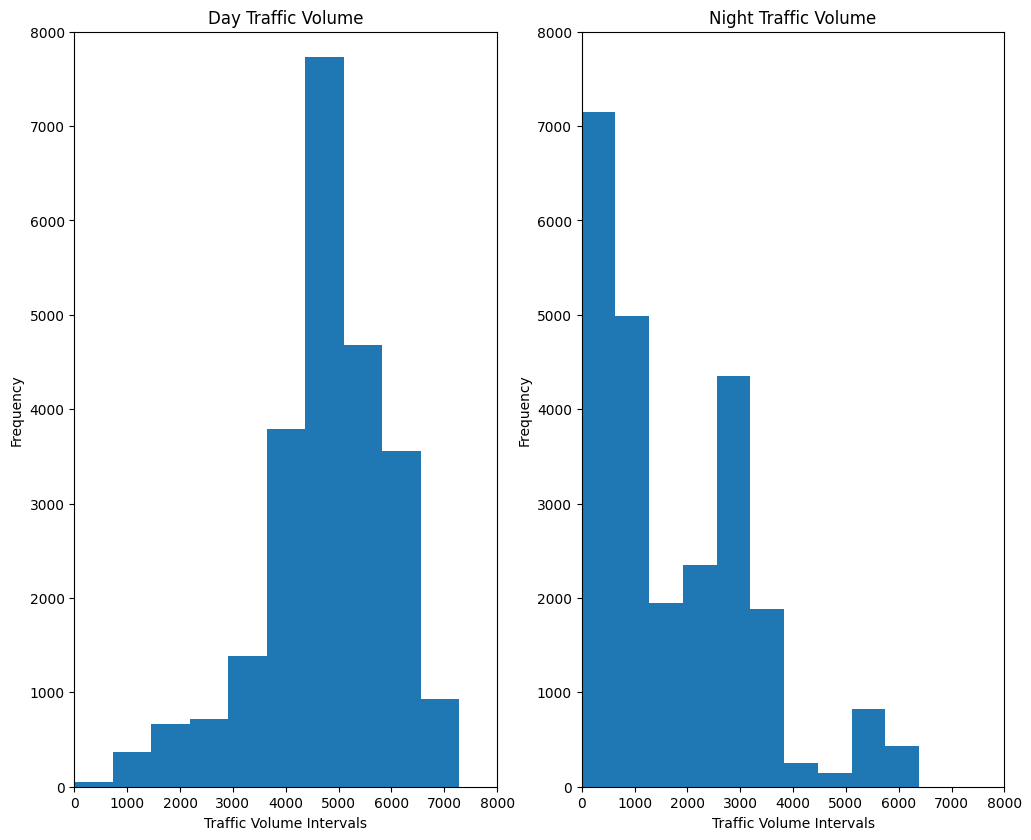

In [10]:
# Creating a grid chart to ease the comparison between the
# two histograms
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
traffic_day['traffic_volume'].plot.hist()
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume Intervals')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
traffic_night['traffic_volume'].plot.hist()
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume Intervals')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()

Looking at the histograms, we can see a huge difference between nighttime and daytime regarding to traffic volume frequency, as we suspected at the beggining. The Day Traffic histogram has a normal distribution shape, while the Night Traffic one has a right skewed shape. The daytime mean is roughly 2.5x higher (4,762) than nighttime (1,785) and about 75% of the time it has a traffic volume greater than 4,200 cars.

Therefore, it is clear that the daytime traffic is much bigger than the night one. Hence, since our goal is to find indicators of heavy traffic, we'll put the nighttime traffic out from our analysis.

# Analyzing the Time Influence

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.
We'll analyze how the traffic volume changed according to these three parameters listed above:
- Month
- Day of the week
- Time of the day

In [11]:
traffic_day['month'] = traffic_day['date_time'].dt.month # Creating a 'month column'
by_month = traffic_day.groupby(['month']).mean() # Grouping the dataframe
# by the new month column and calculating the mean for every column
by_month['traffic_volume']

<ipython-input-11-0a34fef81d67>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

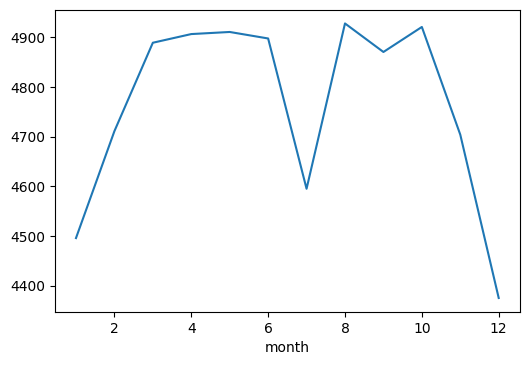

In [12]:
by_month['traffic_volume'].plot.line()
plt.show()

Apparently there is a cycle in the traffic volume. It seems there are two periods that the traffic volume is uniformely distributed at its peak: March - June and August - October. Perhaps it's because these are working months and people pass the station for business. Meanwhile, in the November - February period and July maybe more people are on vacation and aren't using the westbound road.

Let's countinue analyzing, and now we'll check another time unit: day of the week.

In [13]:
# Same as two cells before, but with days of week instead of months
traffic_day['day_of_week'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume']

<ipython-input-13-8c408d847185>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

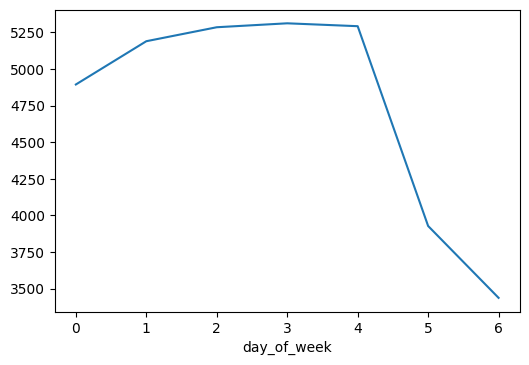

In [14]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Analyzing the graph above, we clearly see a difference between on traffic volume in business days and the weekend, comparing the means, more than 40% higher.

Finally, let's analyze the time of day influence.

In [15]:
# Same as before, but now separating the dataframe into business and 
# weekend days
traffic_day['time_day'] = traffic_day['date_time'].dt.hour
business = traffic_day[traffic_day['day_of_week'] <= 4] # 4 -> Friday
weekend = traffic_day[traffic_day['day_of_week'] > 4] # 5 -> Saturday
business_days = business.groupby('time_day')['traffic_volume'].mean()
weekend_days = weekend.groupby('time_day')['traffic_volume'].mean()
print(business_days)
print(weekend_days)

time_day
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
time_day
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-15-5e866cf09e66>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



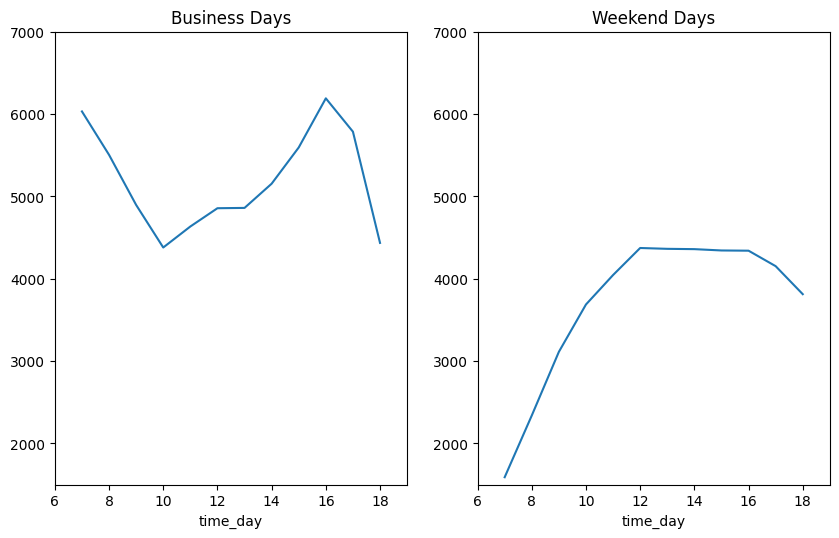

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
business_days.plot.line()
plt.title('Business Days')
plt.xlim(6, 19)
plt.ylim(1500, 7000)

plt.subplot(1, 2, 2)
weekend_days.plot.line()
plt.title('Weekend Days')
plt.xlim(6, 19)
plt.ylim(1500, 7000)

plt.show()

As we see above, the rush hours happen in different periods. During the business days, we see a high traffic volume in the periods of 07:00 - 09:00 and 15:00 - 18:00, perhaps because people are going to work and coming home. while in the weekend days, we have a heavy traffic at the afternoon: 12:00 - 18:00.

# Analyzing the Weather Impact

The dataset provides us with useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [17]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_of_week      -0.416453
time_day          0.172704
Name: traffic_volume, dtype: float64

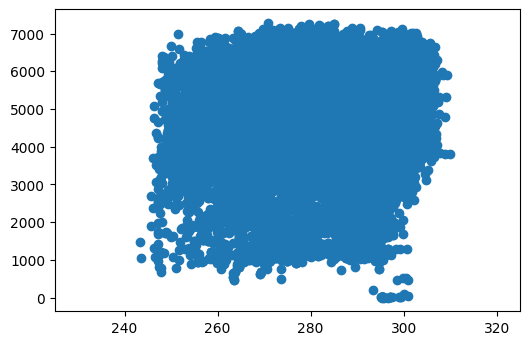

In [18]:
plt.scatter(traffic_day['temp'], traffic_day['traffic_volume'])
plt.xlim(225, 325)
plt.show()

It seems there is no weather column as a reliable indicator for heavy traffic. Even the most correlated one, `temp` with a + 0.13, observing its scatterplot with `traffic_volume`, we cannot see that there is something.

# Analyzing the Weather Types

Now, let's look next at the categorical weather-related columns: `weather_main` and `weather_description`.

In [19]:
# Same time indicators logic but now to the weather ones
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()
print(by_weather_main['traffic_volume'])
print(by_weather_description['traffic_volume'])

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64
weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light inte

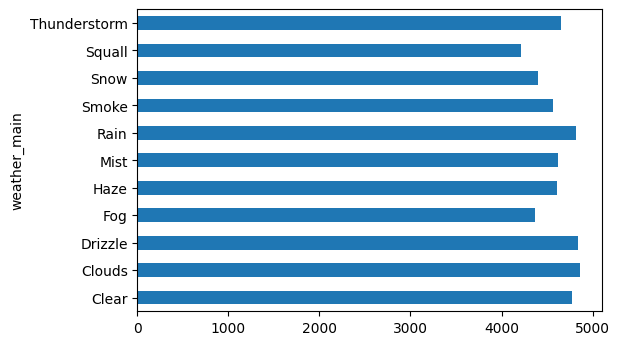

In [20]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

We can't conclude there is a weather type as a indicator of heavy traffic. These are roughly distributed uniformly. Furthermore, there is no any traffic volume exceeding 5,000 cars.

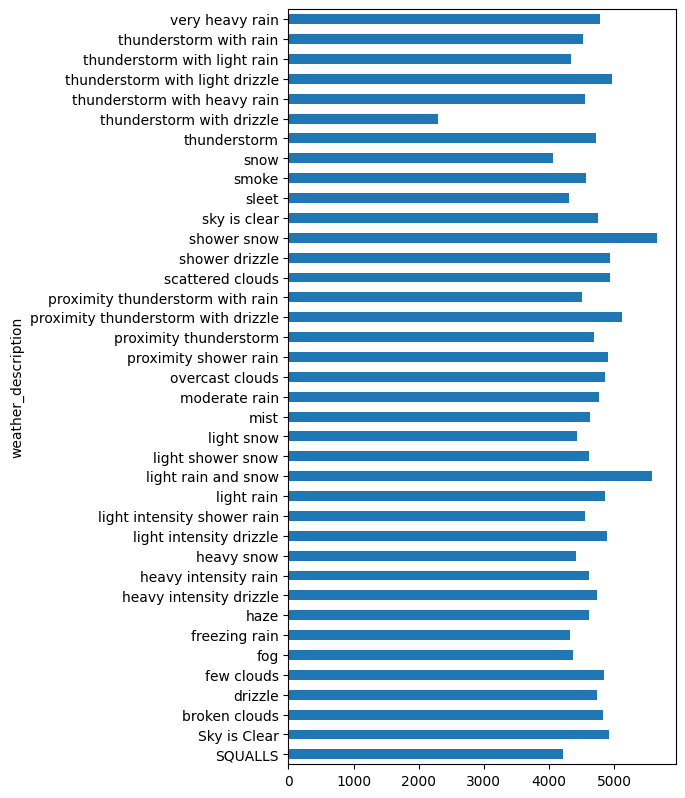

In [21]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000 cars:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of staying home.

# Conclusions

In this project, we found a few indicators that enhances the heavy traffic volume on the I-94 Interstate highway. We can divide these in two macros:
- Time Indicators:
    - March - October month interval
    - Business day (Monday to Friday)
    - 07:00 - 09:00 and 15:00 - 18:00
    
- Weather Indicators:
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle

Despite the weather indicators having exceded 5,000 cars, it's not clear if it has a significative difference to the others types.